* Manuela Victoria 2195193
* Isabella Rodriguez 2195115
* Santiago Vasquez 2185165

# **0. Coneccion con drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**1.Importaciones**


*   Librerias
*   Dataset




## **Importacion librerias**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





## **Importacion dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/proyecto gestion de BD/breast-cancer.data')

print(data)

     no-recurrence-events  30-39  premeno  30-34  0-2  no  3   left  \
0    no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right   
1    no-recurrence-events  40-49  premeno  20-24  0-2  no  2   left   
2    no-recurrence-events  60-69     ge40  15-19  0-2  no  2  right   
3    no-recurrence-events  40-49  premeno    0-4  0-2  no  2  right   
4    no-recurrence-events  60-69     ge40  15-19  0-2  no  2   left   
..                    ...    ...      ...    ...  ...  .. ..    ...   
280     recurrence-events  30-39  premeno  30-34  0-2  no  2   left   
281     recurrence-events  30-39  premeno  20-24  0-2  no  3   left   
282     recurrence-events  60-69     ge40  20-24  0-2  no  1  right   
283     recurrence-events  40-49     ge40  30-34  3-5  no  3   left   
284     recurrence-events  50-59     ge40  30-34  3-5  no  3   left   

      left_low no.1  
0     right_up   no  
1     left_low   no  
2      left_up   no  
3    right_low   no  
4     left_low   no  
..         ... 

#**2.Visualizacion de informacion del datase**t


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   no-recurrence-events  285 non-null    object
 1   30-39                 285 non-null    object
 2   premeno               285 non-null    object
 3   30-34                 285 non-null    object
 4   0-2                   285 non-null    object
 5   no                    285 non-null    object
 6   3                     285 non-null    int64 
 7   left                  285 non-null    object
 8   left_low              285 non-null    object
 9   no.1                  285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


#**3.Creacion de copia del dataset**
*   Visualizacion de los nombres de las caracteristicas
*   Visualizacion de numero de filas y columnas








Se almacena la copia del dataset en un data frame para poder manipular los datos

In [ ]:
df=data.copy()

## **Nombres de las caracteristicas**

In [ ]:
df.columns

Index(['no-recurrence-events', '30-39', 'premeno', '30-34', '0-2', 'no', '3',
       'left', 'left_low', 'no.1'],
      dtype='object')

## **Coorreccion de los nombres de las caracteristicas (heads)**

In [ ]:
columnas = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes',
            'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
df.columns = columnas


## **Numero de filas y columnas**

In [ ]:
num_filas, num_columnas =df.shape
print(f"Dataset tiene {num_filas} filas y {num_columnas} columnas")

Dataset tiene 285 filas y 10 columnas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        262 non-null    object
 1   age          262 non-null    object
 2   menopause    262 non-null    object
 3   tumor-size   262 non-null    object
 4   inv-nodes    262 non-null    object
 5   node-caps    262 non-null    object
 6   deg-malig    262 non-null    int64 
 7   breast       262 non-null    object
 8   breast-quad  262 non-null    object
 9   irradiat     262 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


#**4. Datos repetidos**







Se usa la funcion duplicated para encontrar si hay filas duplicadas considreando que almacena valores booleanos false o true dependiendo de la presencia de datos repetidos

In [ ]:
dup=df.duplicated()
print(dup)

0      False
1      False
2      False
3      False
4      False
       ...  
280    False
281    False
282    False
283    False
284    False
Length: 285, dtype: bool


Se usa el metodo sum para contar el numero de ture que hay en la serie booleana almacenada en la variable duplicados para asi imprimir la cantidad de filas duplicadas

In [ ]:
numero_duplicados = dup.sum()

print("Número de filas duplicadas:", numero_duplicados)

Número de filas duplicadas: 14


Se usa la funcion drop_duplicates para elminar las filas repetidas y verificar que no hubieran datos repetidos comparando la informacion del data frame con la dataset original

In [ ]:
df = df.drop_duplicates()
num_filas, num_columnas =df.shape
print(f"Dataset tiene {num_filas} filas y {num_columnas} columnas \n")

data.info()

Dataset tiene 271 filas y 10 columnas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   no-recurrence-events  285 non-null    object
 1   30-39                 285 non-null    object
 2   premeno               285 non-null    object
 3   30-34                 285 non-null    object
 4   0-2                   285 non-null    object
 5   no                    285 non-null    object
 6   3                     285 non-null    int64 
 7   left                  285 non-null    object
 8   left_low              285 non-null    object
 9   no.1                  285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


#**5. Conteo de datos nulos por caracteristica**



*   Eliminacion de caracteristicas con respectivo analisis
*   Estadisticas resumidas de variable numerica







Se realiza la busqueda de los valores nulos usando la funcion isnull en el data frame y seguido del metodo sum que se encarga de sumar los valores nulos encontrados por cada una de las caracteristicas

In [ ]:
valores_n_c = df.isnull().sum()
print("Valores nulos por cada caracteristica:")
print(valores_n_c)

Valores nulos por cada caracteristica:
Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


Se realiza un mapa de calor para ve visualmente los valores nulos presentes en el data frame

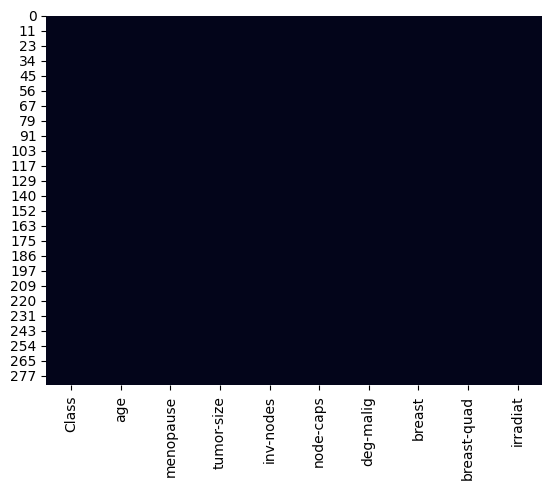

In [ ]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()


## Estadisticas resumidas de variable numerica

In [ ]:
estadisticas_resumidas = df.describe()

print(estadisticas_resumidas)

        deg-malig
count  271.000000
mean     2.055351
std      0.735778
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      3.000000


#**6.Limpieza de datos categoricos**








Se realiza la limpieza caracteristica categoricas una por una, observando con el metodo value_counts cuales son las diversas respuestas y cuales significan lo mismo para realizar la respectiva correccion. Tambien si se encuentran valores atipicos en estas caracteristicas

## Caracteristica: Class

In [ ]:
df["Class"].value_counts()


no-recurrence-events    190
recurrence-events        81
Name: Class, dtype: int64

## Caracteristica: age

In [ ]:
df["age"].value_counts()

50-59    91
40-49    87
60-69    53
30-39    33
70-79     6
20-29     1
Name: age, dtype: int64

## Caracteristica: menopause

In [ ]:
df["menopause"].value_counts()

premeno    142
ge40       122
lt40         7
Name: menopause, dtype: int64

## Caracteristica: tumor-size

In [ ]:
df["tumor-size"].value_counts()


30-34    59
25-29    51
20-24    47
15-19    26
10-14    26
40-44    21
35-39    18
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64

## Caracteristica: inv-nodes

In [ ]:
df["inv-nodes"].value_counts()


0-2      199
3-5       36
6-8       16
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64

## Caracteristica: node-caps

In [ ]:
df["node-caps"].value_counts()

no     208
yes     55
?        8
Name: node-caps, dtype: int64

### Eliminacion de los datos atipicos

In [ ]:
df  = df.drop(df[df["node-caps"] == "?"].index)


### Verificacion de la eliminacion de los datos atipicos

In [ ]:
df["node-caps"].value_counts()

no     208
yes     55
Name: node-caps, dtype: int64

## Caracteristica: breast

In [ ]:
df["breast"].value_counts()

left     136
right    127
Name: breast, dtype: int64

## Caracteristica: breast-quad

In [ ]:
df["breast-quad"].value_counts()

left_low     98
left_up      89
right_up     32
right_low    23
central      20
?             1
Name: breast-quad, dtype: int64

### Eliminacion de los datos atipicos

In [ ]:
df  = df.drop(df[df["breast-quad"] == "?"].index)

### Verificacion de la liminacion de los datos atipicos

In [ ]:
df["breast-quad"].value_counts()

left_low     98
left_up      89
right_up     32
right_low    23
central      20
Name: breast-quad, dtype: int64

## Caracteristica: irradiat

In [ ]:
df["irradiat"].value_counts()

no     201
yes     61
Name: irradiat, dtype: int64

# **7. Visualizacion de grafico de caja de las caracteristicas numericas para verificar ausencia de datos atipicos**


*   Caracteristica: deg-malig




## Caracteristica: deg-malig



In [ ]:
df["deg-malig"].value_counts()

2    123
3     78
1     61
Name: deg-malig, dtype: int64

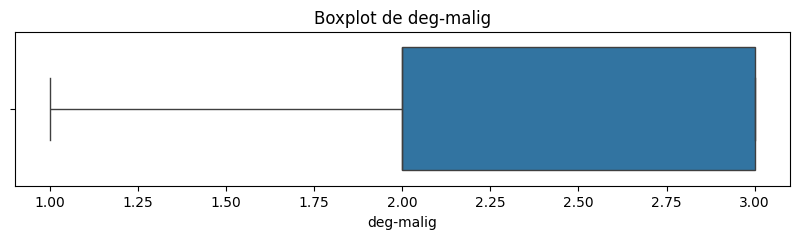

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['deg-malig'])
plt.title('Boxplot de deg-malig')
plt.xlabel('deg-malig')
plt.show()

# **8.Graficos**


*   Histograma del tamaño del tumor
*   Histograma de las edades
*   Grafico de torta de la variable capsulas nodales
*   Grafico de torta de la variable clase
*   Grafico de la variable de salida deg-malig
*   Distribución de deg-malig en la característica recurrencia (clase)
*   Distribución de deg-malig en la característica capsulas nodales
*   Distribución de deg-malig en la característica radiacion

## Histograma del tamaño de lo tumor

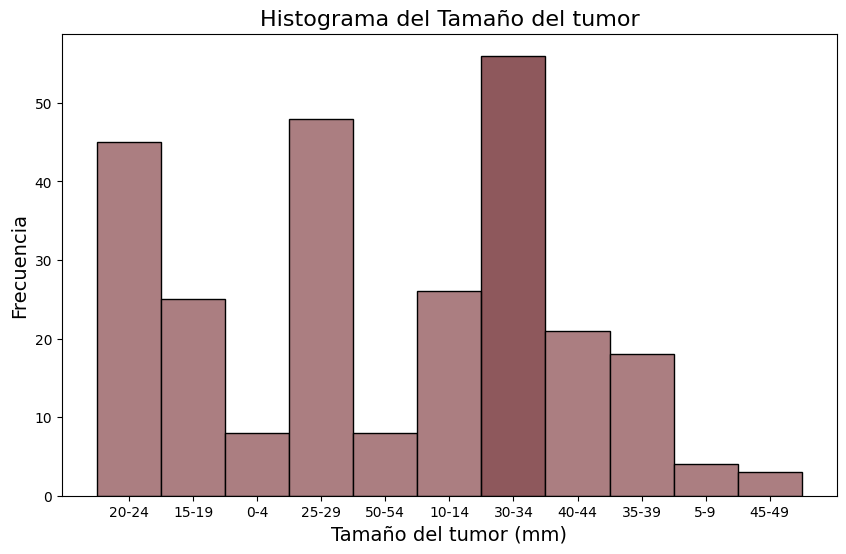

In [ ]:
plt.figure(figsize=(10, 6))
color_maximo = '#692025'
frecuencia_edad = df['tumor-size'].value_counts()
frecuencia_maxima = frecuencia_edad.max()
sns.histplot(data=df, x='tumor-size', bins=20, kde=False, color=color_maximo)

for barra in plt.gca().patches:
    if barra.get_height() != frecuencia_maxima:
        barra.set_facecolor('#AB7E81')

plt.title('Histograma del Tamaño del tumor', fontsize=16)
plt.xlabel('Tamaño del tumor (mm)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.show()

## Histograma de las edades

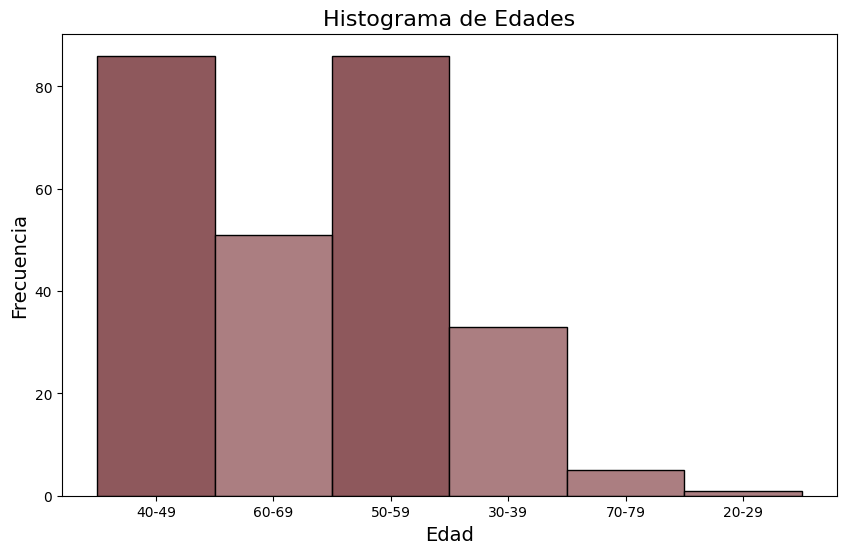

In [ ]:
plt.figure(figsize=(10, 6))
color_maximo = '#692025'
frecuencia_edad = df['age'].value_counts()
frecuencia_maxima = frecuencia_edad.max()
sns.histplot(data=df, x='age', bins=20, kde=False, color=color_maximo)

for barra in plt.gca().patches:
    if barra.get_height() != frecuencia_maxima:
        barra.set_facecolor('#AB7E81')

plt.title('Histograma de Edades', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.show()

## Grafico de torta de la variable capsulas nodales

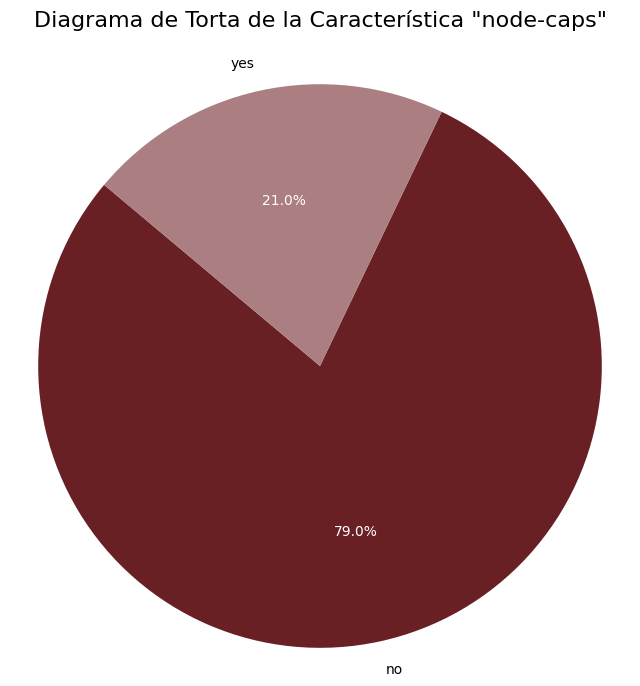

In [ ]:
valores_node_caps = df['node-caps'].value_counts()
colores = ['#692025','#AB7E81']
plt.figure(figsize=(8, 8))
_, _, autopcts = plt.pie(valores_node_caps, labels=valores_node_caps.index, startangle=140, colors=colores, autopct='%1.1f%%', textprops={'color': 'black'})

for label in autopcts:
    label.set_color('white')

plt.title('Diagrama de Torta de la Característica "node-caps"\n', fontsize=16)
plt.axis('equal')
plt.show()

## Grafico de torta de la variable clase

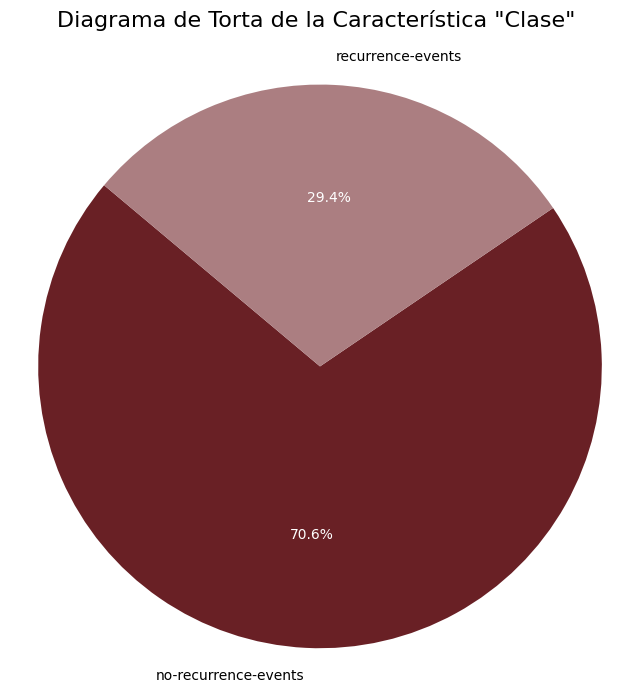

In [ ]:
valores_node_caps = df['Class'].value_counts()
colores = ['#692025','#AB7E81']
plt.figure(figsize=(8, 8))
_, _, autopcts = plt.pie(valores_node_caps, labels=valores_node_caps.index, startangle=140, colors=colores, autopct='%1.1f%%', textprops={'color': 'black'})

for label in autopcts:
    label.set_color('white')

plt.title('Diagrama de Torta de la Característica "Clase" \n', fontsize=16)
plt.axis('equal')
plt.show()

## Grafico de la variable de salida deg-malig

<ipython-input-58-aaf2f5749c60>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='deg-malig', bins=[0.5, 1.5, 2.5, 3.5], kde=False, palette=custom_palette)


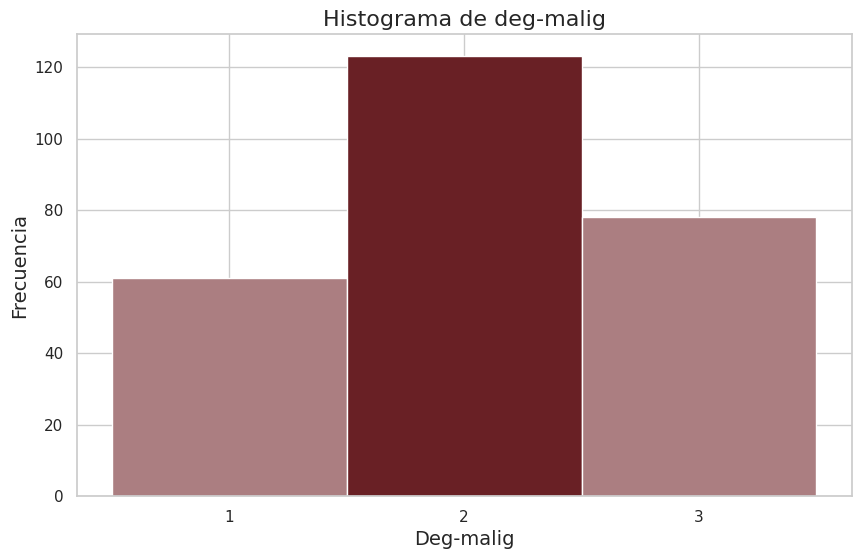

In [ ]:
sns.set(style="whitegrid")
custom_palette = ['#AB7E81', '#692025', '#AB7E81']
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='deg-malig', bins=[0.5, 1.5, 2.5, 3.5], kde=False, palette=custom_palette)

for i, barra in enumerate(plt.gca().patches, start=1):
    barra.set_facecolor(custom_palette[i - 1])

plt.xticks([1, 2, 3])
plt.title('Histograma de deg-malig', fontsize=16)
plt.xlabel('Deg-malig', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

## Distribución de deg-malig en la característica recurrencia (clase)

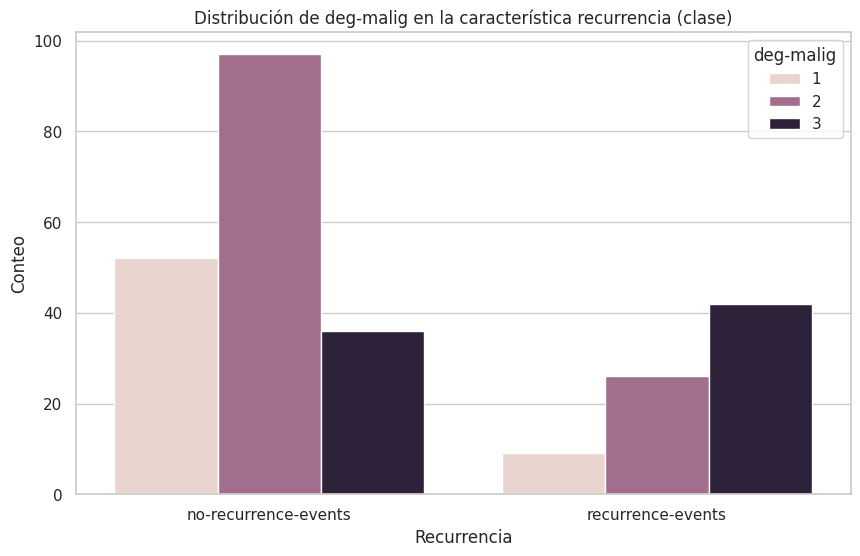

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class', hue='deg-malig')
plt.title('Distribución de deg-malig en la característica recurrencia (clase)')
plt.xlabel('Recurrencia')
plt.ylabel('Conteo')
plt.show()

## Distribución de deg-malig en la característica capsulas nodales

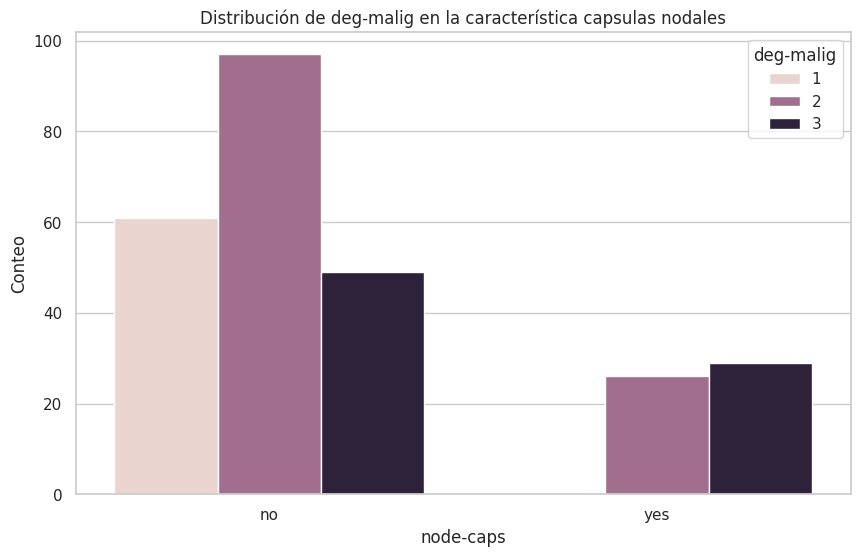

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='node-caps', hue='deg-malig')
plt.title('Distribución de deg-malig en la característica capsulas nodales')
plt.xlabel('node-caps')
plt.ylabel('Conteo')
plt.show()

## Distribución de deg-malig en la característica radiacion

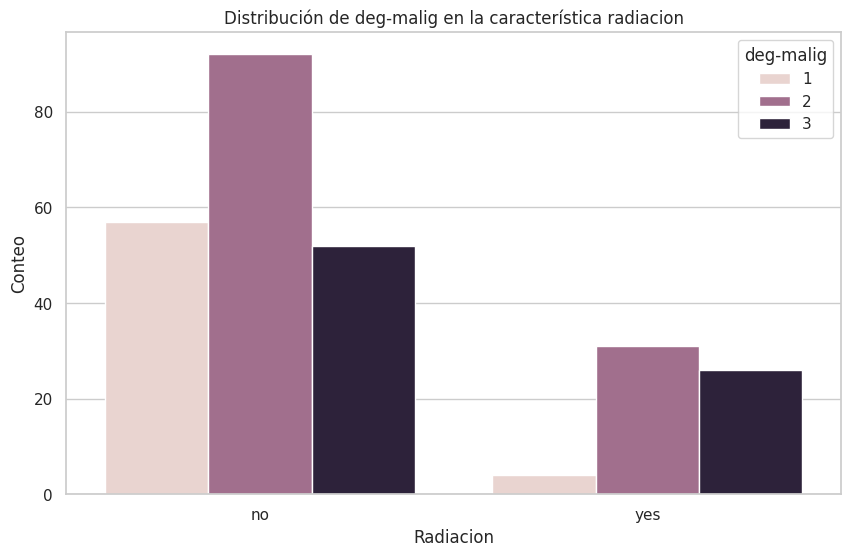

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='irradiat', hue='deg-malig')
plt.title('Distribución de deg-malig en la característica radiacion')
plt.xlabel('Radiacion')
plt.ylabel('Conteo')
plt.show()

# Descarga de codigo en archivo .csv

In [ ]:
df.to_csv('Proyecto_Gestion_BD.csv', index=False)